In [1]:
import stream as st
st.__version__

/opt/conda/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets
/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


'1.0'

In [2]:
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

In [3]:
adata=st.read(file_name='/data/Integration_APE_pos_APE_neg/input_matrix_traj.tsv',workdir='/data/Integration_APE_pos_APE_neg')

Saving results in: /data/Integration_APE_pos_APE_neg


In [4]:
import pandas as pd
df = pd.read_csv("obs.csv",sep=",",header=0,index_col=0)


In [5]:
adata.obs['desc_0.4'] = df['desc_0.4']

In [6]:
adata.var_names_make_unique()

In [7]:
adata_sub = adata

In [8]:
st.cal_qc(adata_sub,assay='rna')

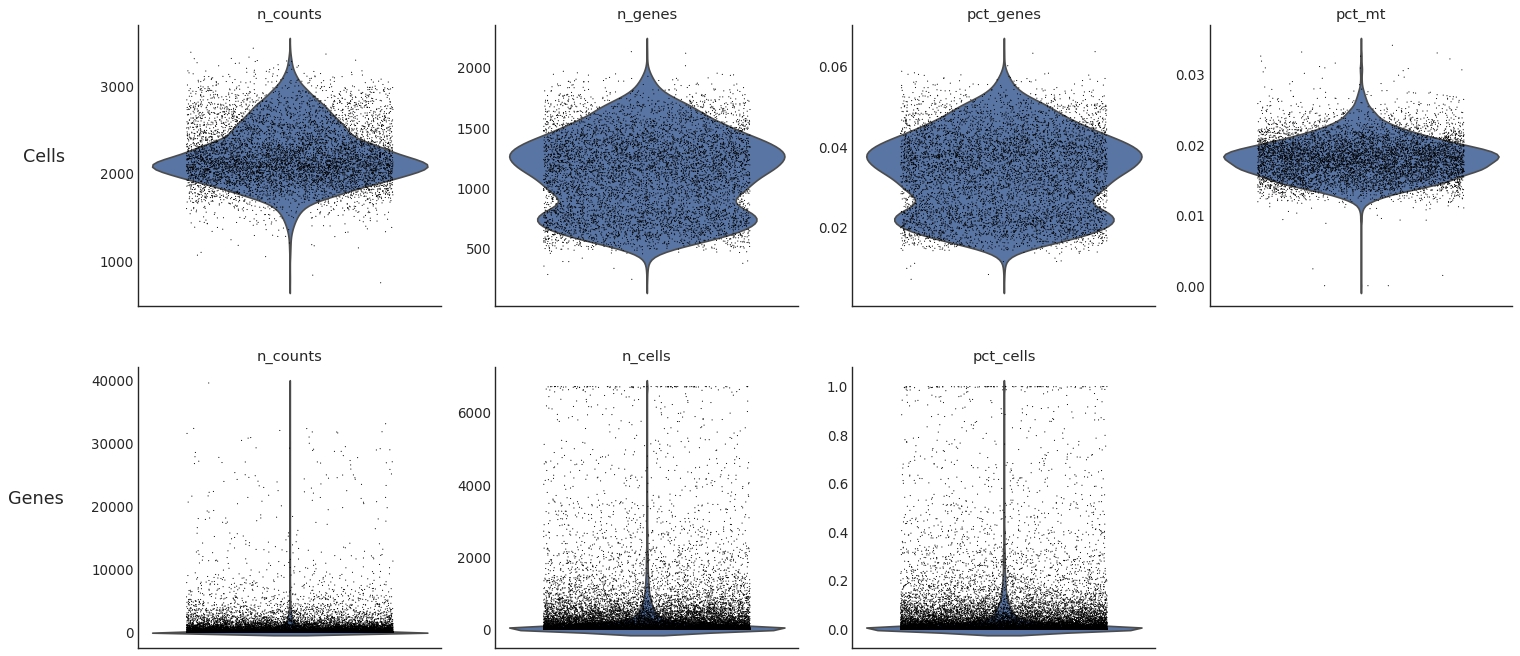

In [9]:
st.plot_qc(adata_sub,jitter=0.3,)

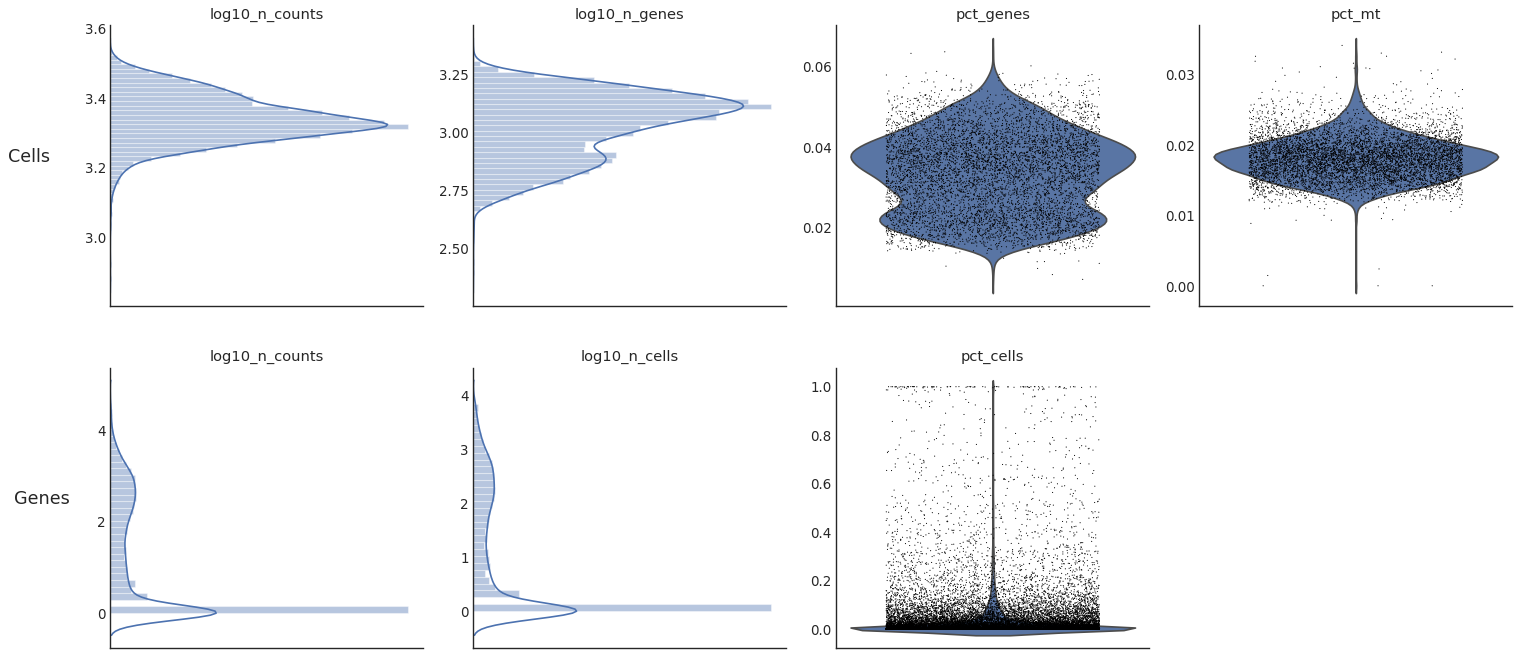

In [10]:
### histogram plots and log-scale are also supported
st.plot_qc(adata_sub,jitter=0.3,log_scale=[0,1,4,5],hist_plot=[0,1,4,5]) 

In [11]:
st.filter_cells(adata_sub,min_n_features= 100)
st.filter_features(adata_sub,min_n_cells = 5)

filter cells based on min_n_features
after filtering out low-quality cells: 
6725 cells, 33538 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
6725 cells, 15438 genes


In [12]:
###Normalize gene expression based on library size  
st.normalize(adata_sub,method='lib_size')
###Logarithmize gene expression 
st.log_transform(adata_sub)
###Remove mitochondrial genes 
st.remove_mt_genes(adata_sub)

remove mitochondrial genes:
['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']


772 variable genes are selected


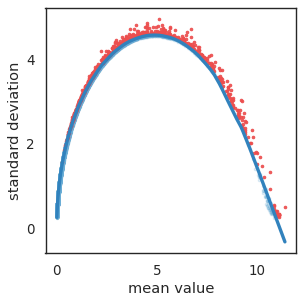

In [13]:
st.select_variable_genes(adata_sub,loess_frac=0.01,percentile=95)

In [14]:
#color = {'C0' : '#e41a1c','C1' : '#377eb8','C2' : '#4daf4a','C3': '#984ea3','C4': '#ff7f00','C5': '#ffff33','C6':'#a65628','C7': '#f781bf'}

In [15]:
#adata_sub.uns['desc_0.4_colors'] = color

In [16]:
adata_sub.obs['desc_0.4'] = adata_sub.obs['desc_0.4'].astype('category')

In [17]:
import scanpy

adata_sub.rename_categories('desc_0.4', ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8'])

In [18]:
st.dimension_reduction(adata_sub,method='se',
                       feature='var_genes',
                       n_neighbors=50,
                       n_components=4,
                       n_jobs=10)

feature var_genes is being used ...
10 cpus are being used ...


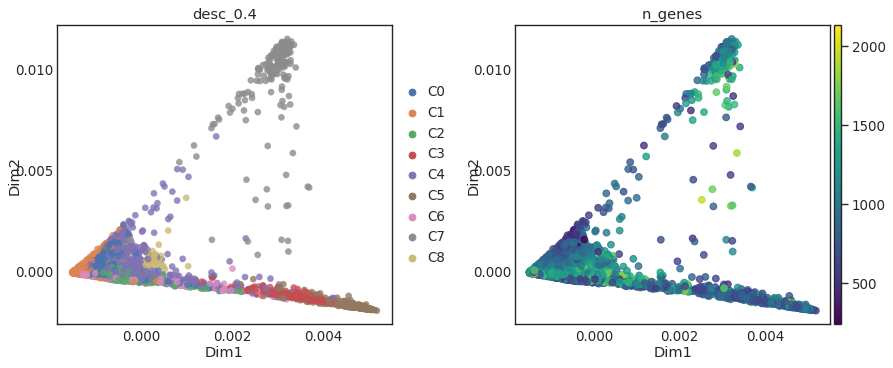

In [19]:
st.plot_dimension_reduction(adata_sub,color=['desc_0.4','n_genes'],
                            n_components=2,show_graph=False,show_text=False)

In [20]:
st.seed_elastic_principal_graph(adata_sub,n_clusters=9)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 9
Calculatng minimum spanning tree...
Number of initial branches: 7


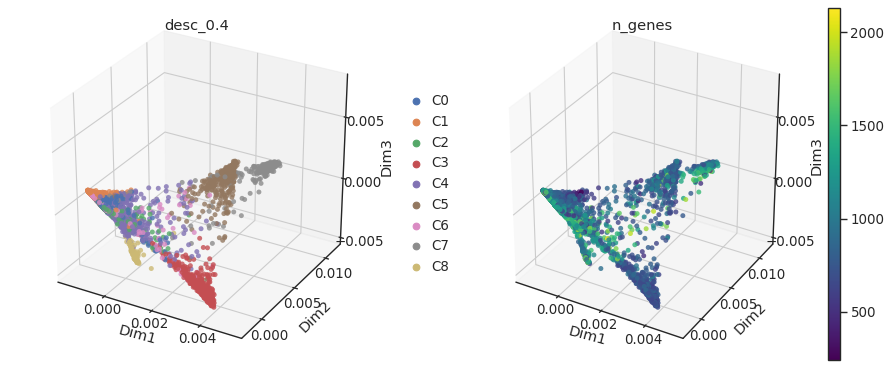

In [21]:
st.plot_dimension_reduction(adata_sub,color=['desc_0.4','n_genes'],
                            n_components=3,show_graph=False,show_text=False)

In [22]:
adata_sub.obs['desc_0.4'].value_counts()

C0    1755
C2    1293
C1    1226
C4     774
C3     541
C6     518
C5     328
C7     195
C8      95
Name: desc_0.4, dtype: int64

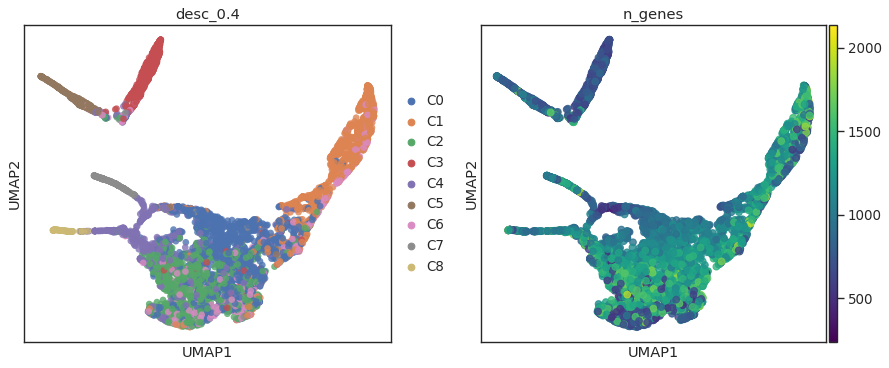

In [23]:
st.plot_visualization_2D(adata_sub,method='umap',n_neighbors=50,
                         color=['desc_0.4','n_genes'],use_precomputed=False)

In [24]:
st.seed_elastic_principal_graph(adata_sub,n_clusters=8,use_vis=True)

Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 8
Calculatng minimum spanning tree...
Number of initial branches: 3


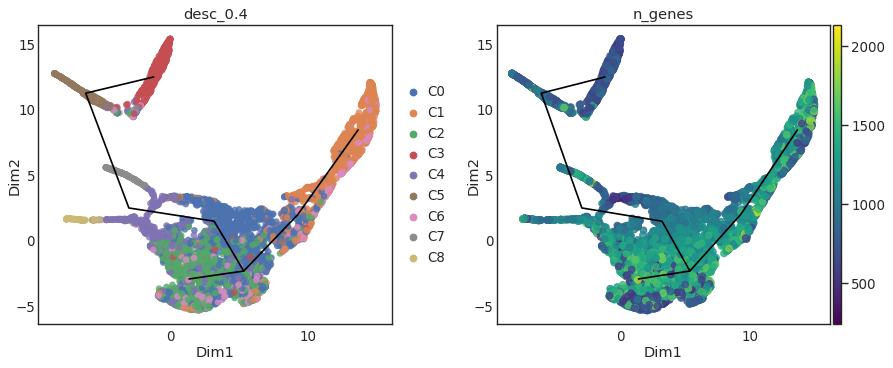

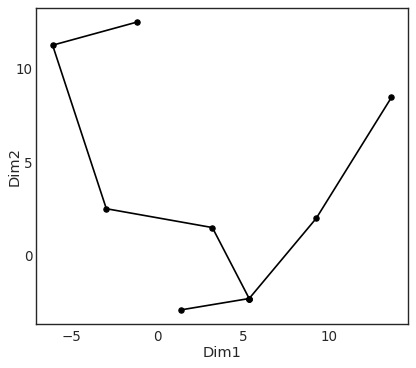

In [25]:
st.plot_dimension_reduction(adata_sub,color=['desc_0.4','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata_sub,show_text=False)

In [26]:
st.elastic_principal_graph(adata_sub,epg_alpha=0.01,epg_mu=0.05,epg_lambda=0.01)

Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 6725 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
8
 
9
 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

4||50
	
1.446
	
50
	
49
	
40
	
4
	
0
	
0
	
0.7165
	
0.6222
	
0.9883
	
0.9898
	
0.6559
	
0.07355
	
3.678
	
183.9
	
0


24.33 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 9


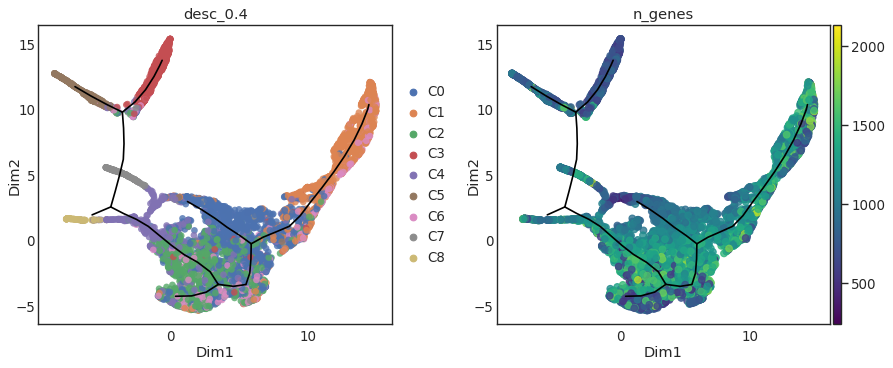

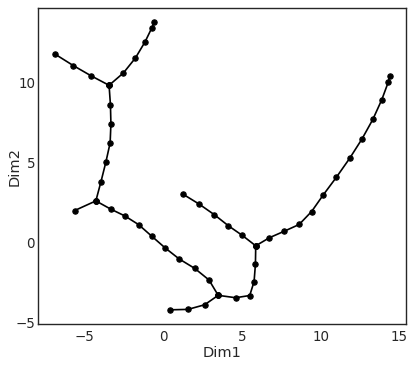

In [27]:
st.plot_dimension_reduction(adata_sub,color=['desc_0.4','n_genes'],n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata_sub,show_text=False)

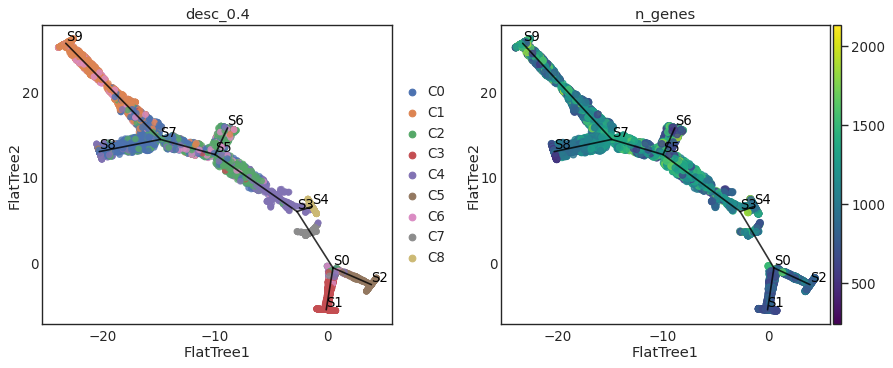

In [28]:
st.plot_flat_tree(adata_sub,color=['desc_0.4','n_genes'],
                  dist_scale=0.5,show_graph=True,show_text=True)

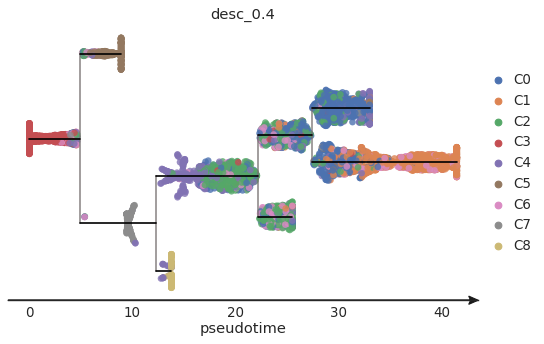

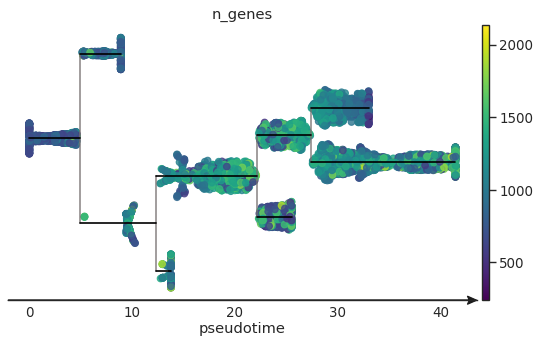

In [29]:
st.plot_stream_sc(adata_sub,root='S1',color=['desc_0.4','n_genes'],
                  dist_scale=0.5,show_graph=True,show_text=False)

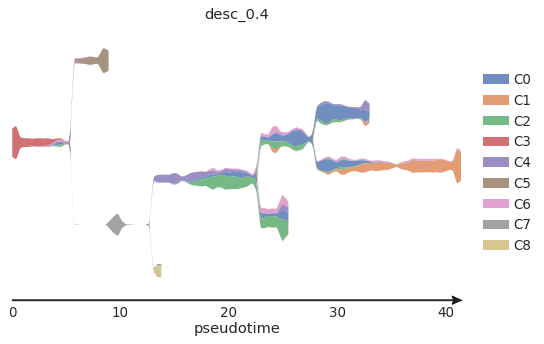

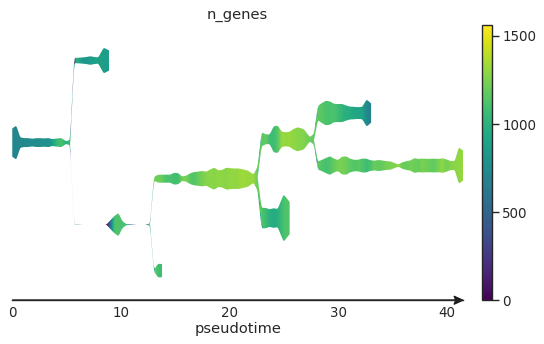

In [30]:
st.plot_stream(adata_sub,root='S1',color=['desc_0.4','n_genes'])

### 1) detect marker genes for each leaf branch

In [31]:
st.detect_leaf_markers(adata_sub,marker_list=adata_sub.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       root='S1',n_jobs=10)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...
10 cpus are being used ...
772 markers are being scanned ...


In [32]:
adata_sub.uns['leaf_markers_all'].head()

,zscore,H_statistic,H_pvalue,S1S0_pvalue,S0S2_pvalue,S7S8_pvalue,S7S9_pvalue,S5S6_pvalue,S3S4_pvalue
JCHAIN,2.23572,2892.39,0,0,0,0,0,0,1
CLEC9A,2.21301,2047.47,0,1,0,0,0,0,4.48692e-170
C1orf54,2.16865,3020.67,0,1,0,0,0,0,0
S100A11,1.86939,1982.45,0,3.30529e-99,1,0,0,1.23518e-232,2.9135e-96
CCL3L1,1.78485,1936.44,0,1.88575e-38,1,0,0,1.92953e-252,6.87864e-121


### 2) detect transition genes for each branch

In [33]:
st.detect_transition_markers(adata_sub,marker_list=adata_sub.uns['var_genes'],cutoff_spearman=0.4,cutoff_logfc=0.25,
                             root='S1',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
772 markers are being scanned ...


In [34]:
adata_sub.uns['transition_markers'][('S1','S0')].head()

,stat,logfc,pval,qval
HLA-DQB1,-0.638912,0.451477,1.177467e-68,5.734264e-66
CD83,-0.598159,0.553002,3.053085e-58,7.434263e-56
BCL2A1,-0.593211,1.916670,4.457049e-57,7.235277e-55
HLA-DQA2,-0.586405,1.650144,1.651672e-55,2.010911e-53
ID2,-0.546654,0.322965,4.809011e-47,4.683977e-45


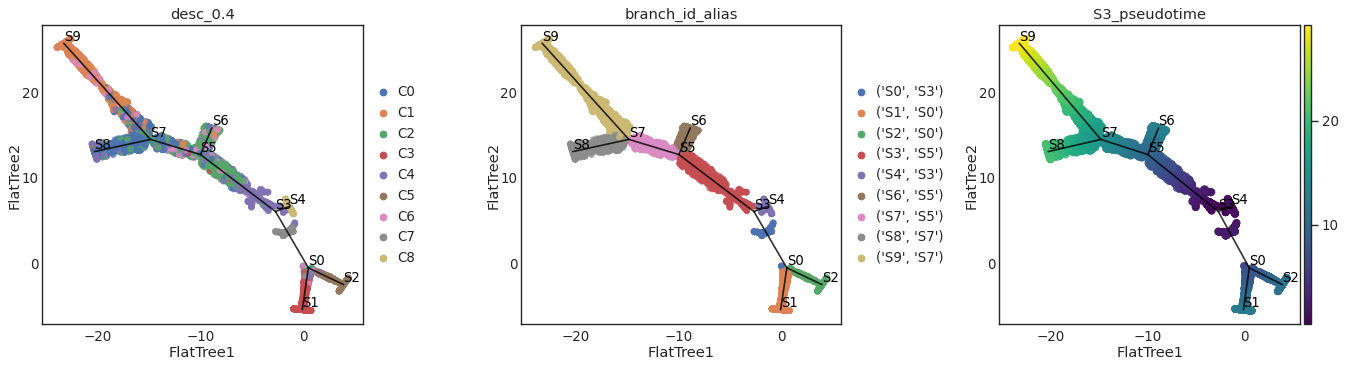

In [35]:
st.plot_flat_tree(adata_sub,color=['desc_0.4','branch_id_alias','S3_pseudotime'],
                  dist_scale=0.5,show_graph=True,show_text=True)

ValueError: min() arg is an empty sequence

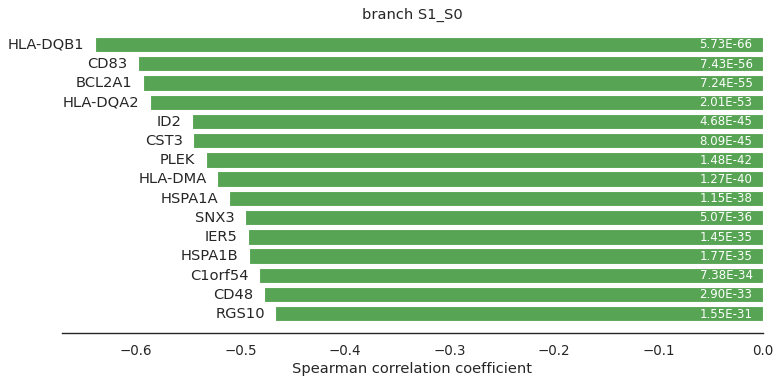

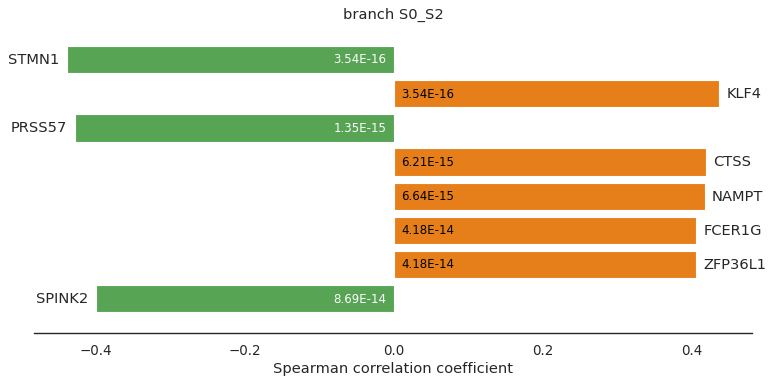

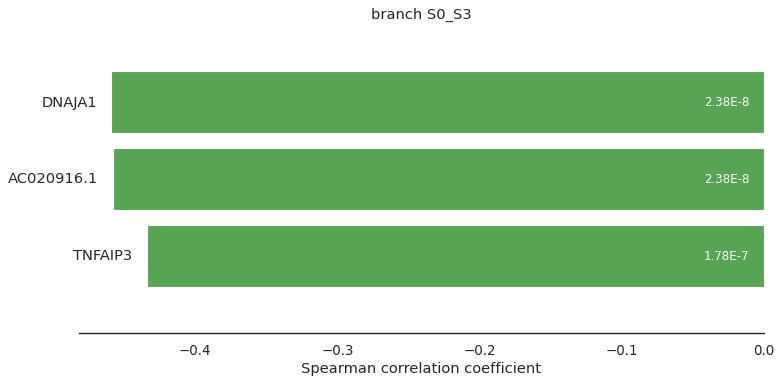

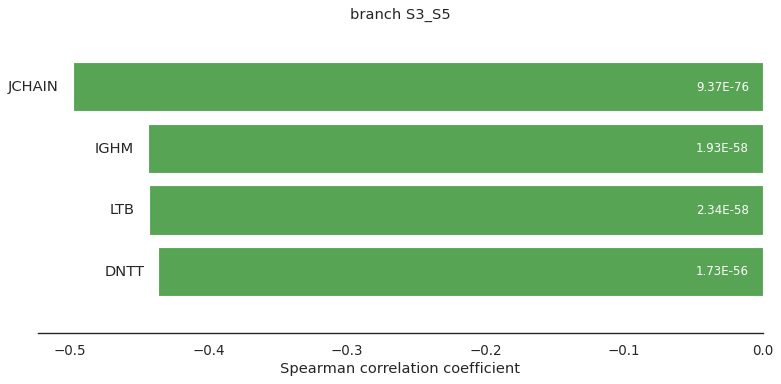

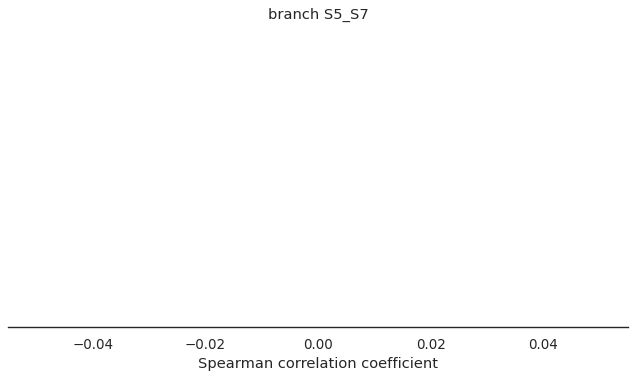

In [36]:
st.plot_transition_markers(adata_sub,fig_size=(10,5))

### 3) detect marker genes that are differentially expressed between pairs of branches

In [37]:
st.detect_de_markers(adata_sub,marker_list=adata_sub.uns['var_genes'],cutoff_zscore=1,cutoff_logfc=0.25,
                     root='S1',n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
772 markers are being scanned ...


In [39]:
#adata_sub.uns['de_markers_greater'][(('S1', 'S3'), ('S3', 'S4'))].head()

In [40]:
#adata_sub.uns['de_markers_less'][(('S3', 'S4'), ('S3', 'S5'))].head()

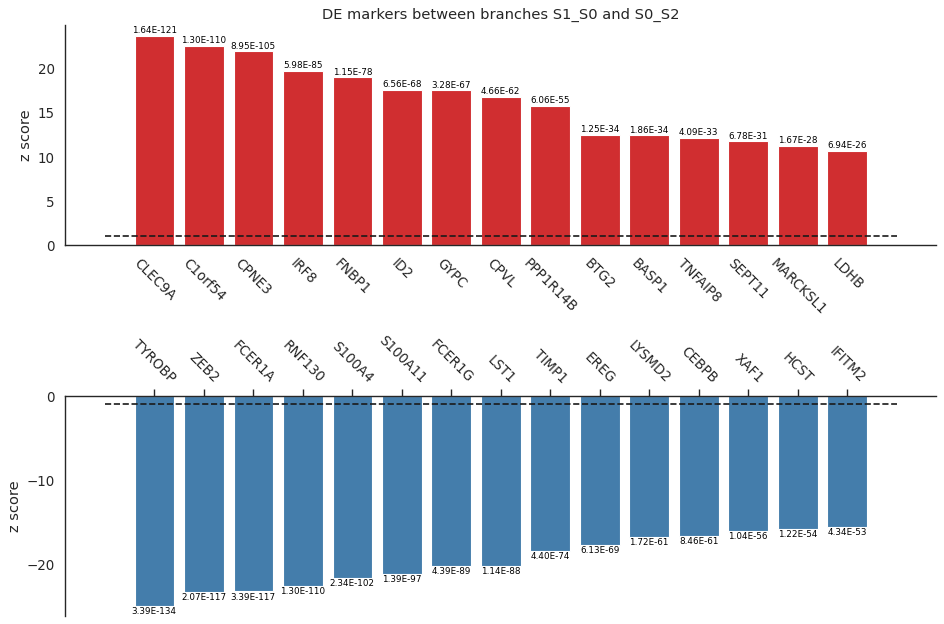

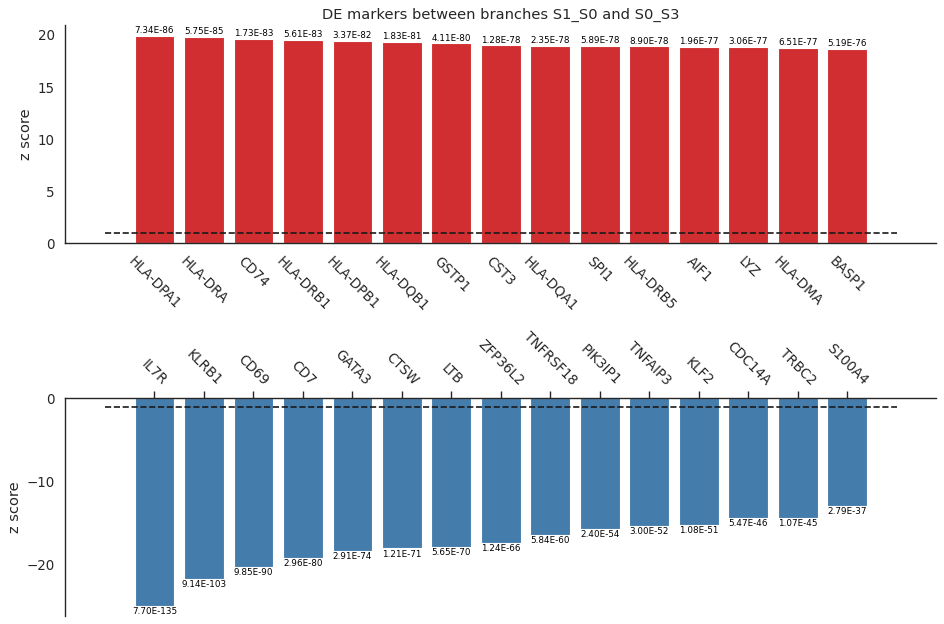

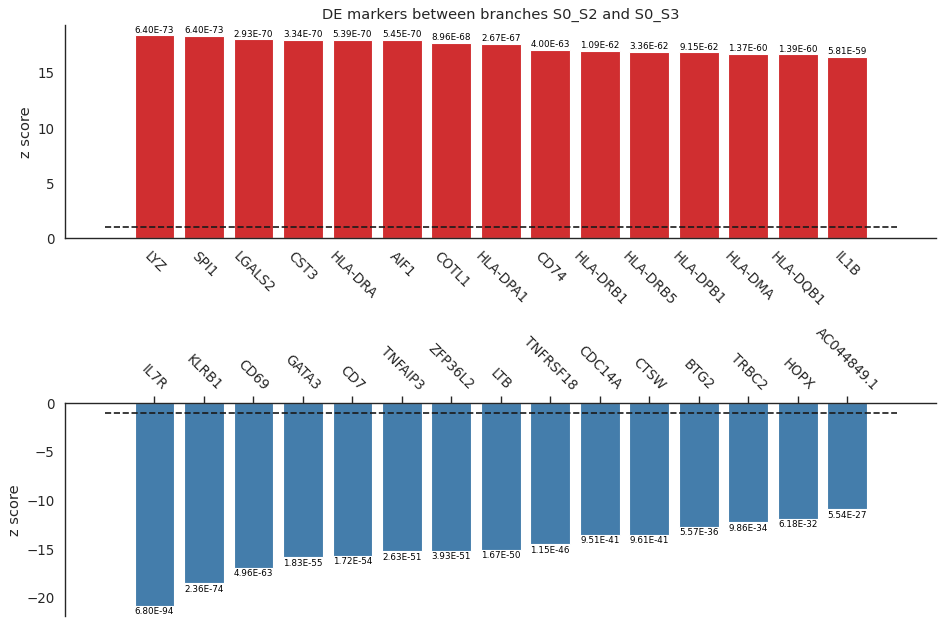

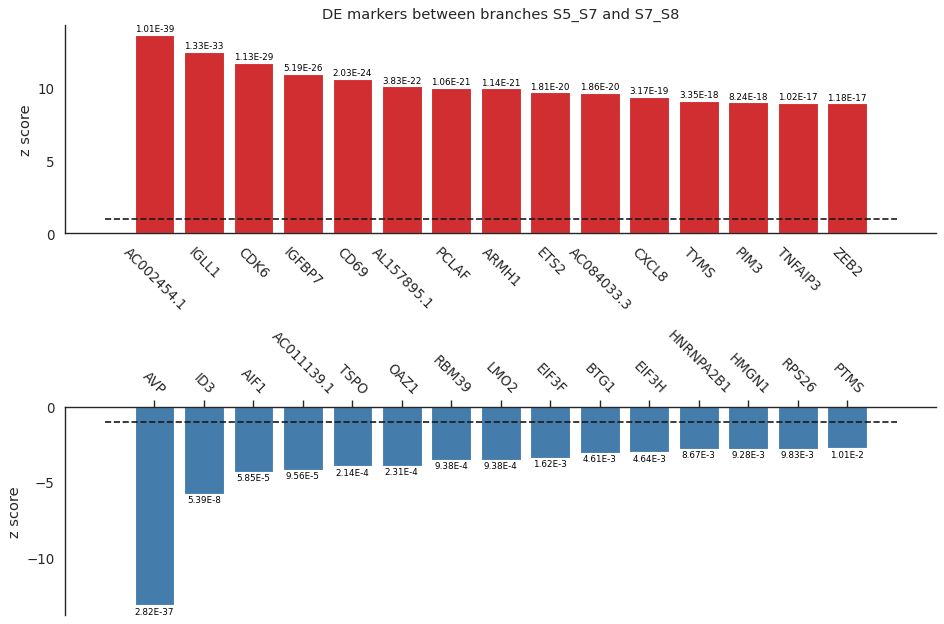

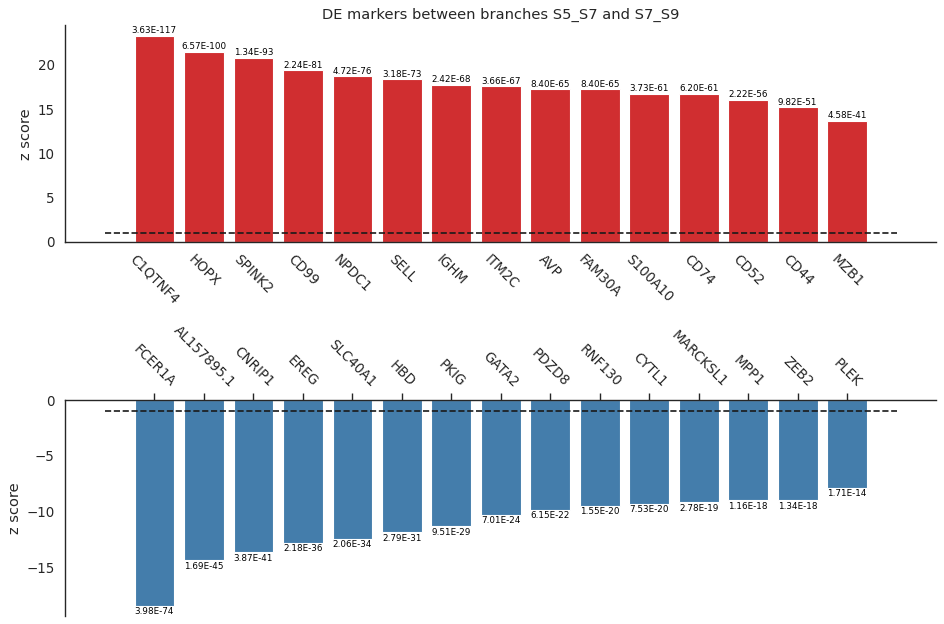

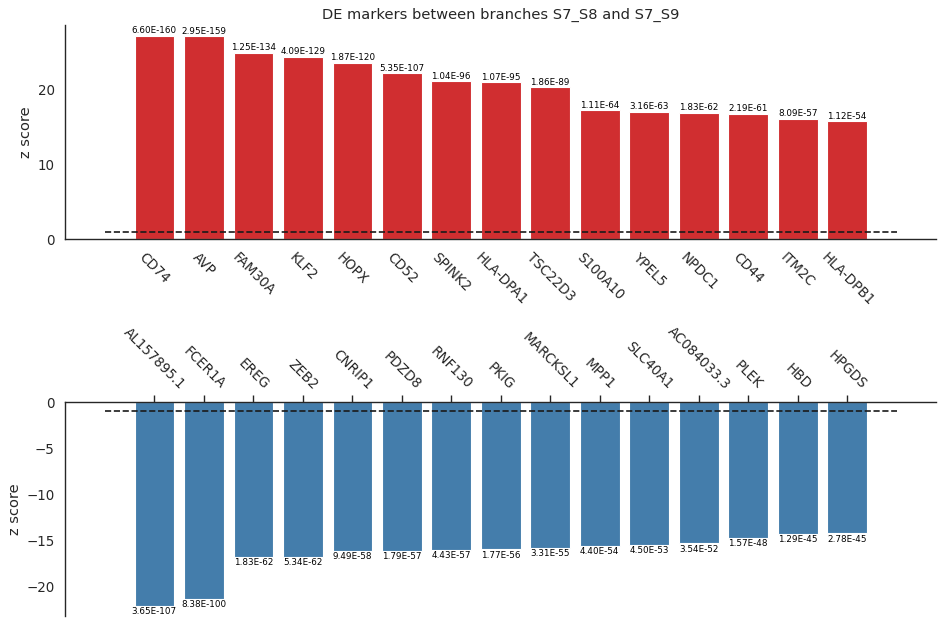

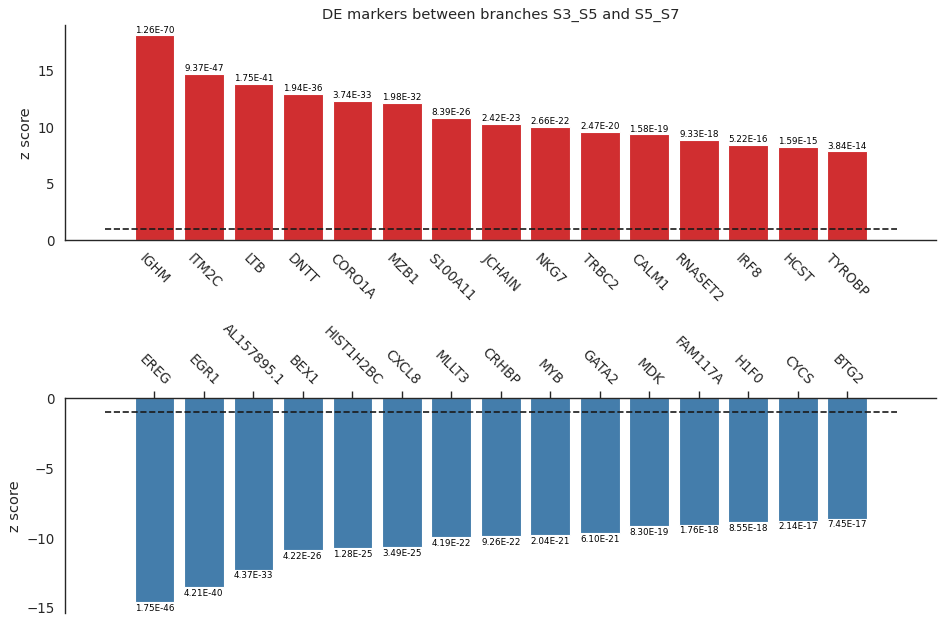

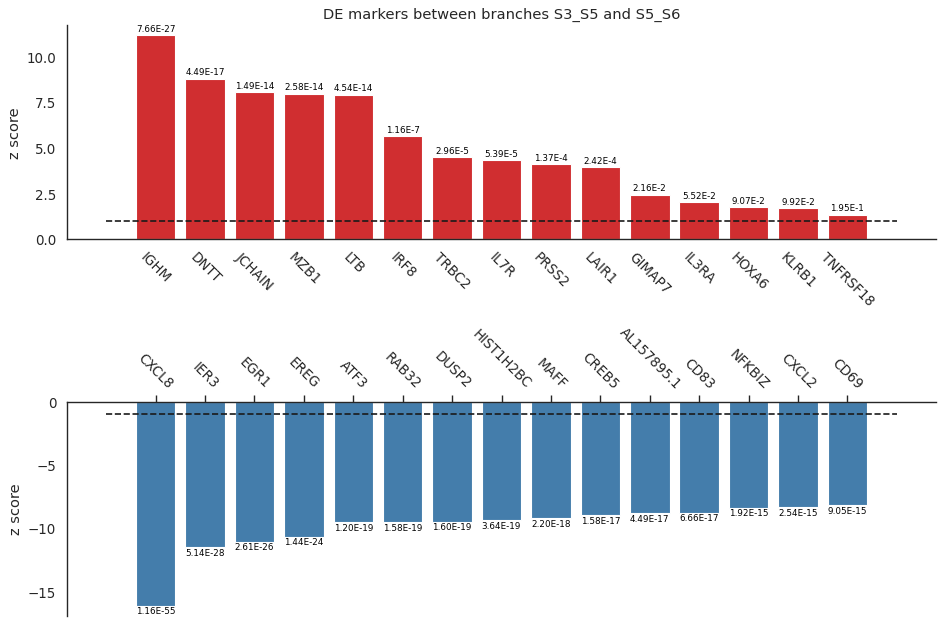

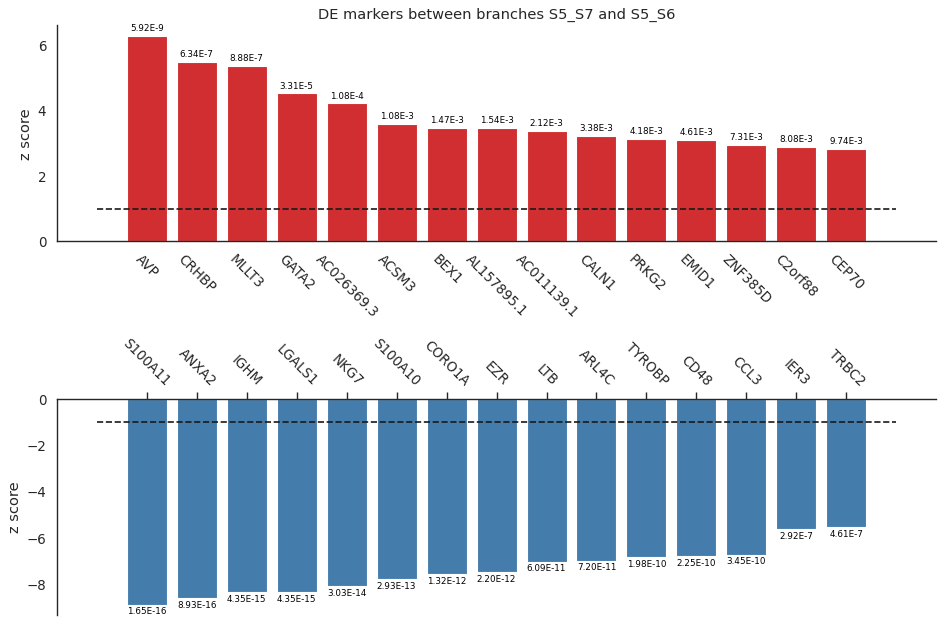

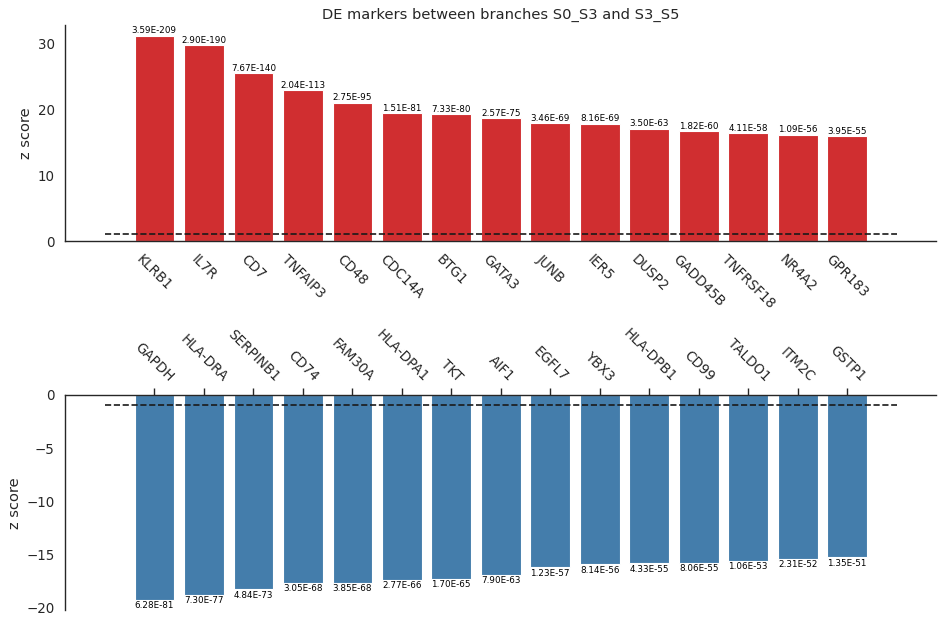

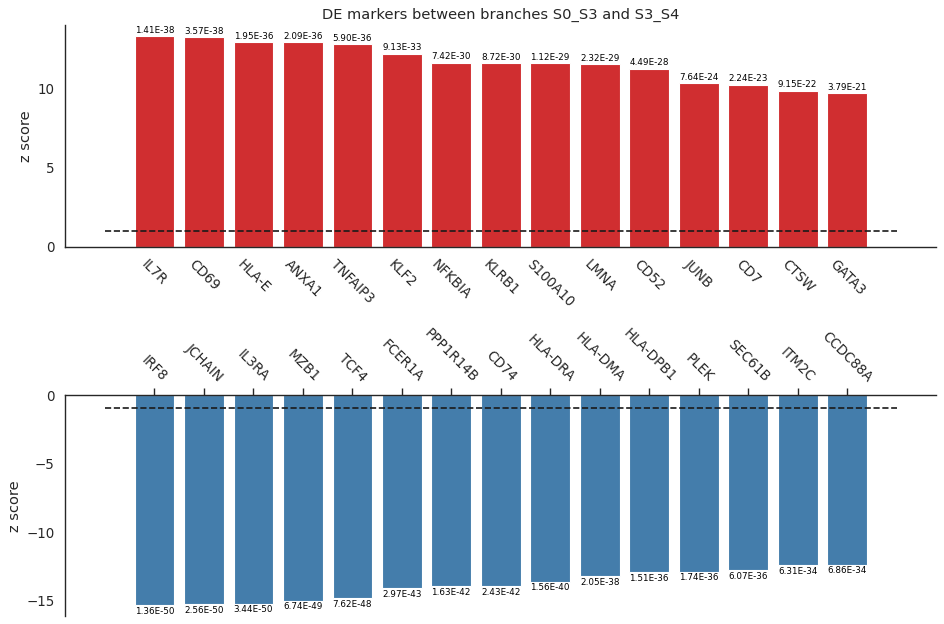

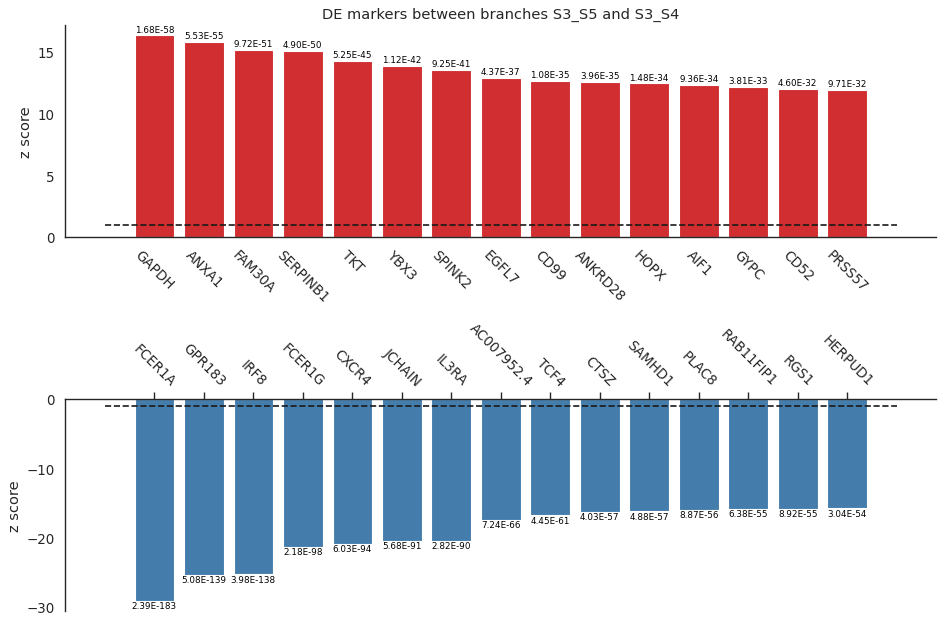

In [41]:
st.plot_de_markers(adata_sub)

### 4) detect cell population-specific markers

In [42]:
st.detect_markers(adata_sub,ident='desc_0.4',marker_list=adata_sub.uns['var_genes'],cutoff_zscore=1.0,cutoff_pvalue=0.01)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
772 markers are being scanned ...


In [43]:
st.write(adata,file_name='stream_result_bif.pkl')

In [44]:
adata_sub.uns['markers_desc_0.4']

{'C0':              zscore H_statistic      H_pvalue            C1            C2  \
 AVP         2.08785     2557.23             0             0   2.56527e-98   
 MALAT1      1.77231     3082.89             0  1.92608e-133  8.85048e-279   
 RPL30        1.5493     3180.44             0  9.18409e-195  1.22527e-265   
 RPS24       1.51665     3156.62             0  5.94157e-175  2.55898e-240   
 JUN         1.50806     2536.92             0   3.35142e-62  5.53498e-198   
 RPL11       1.47667     3322.47             0  6.77683e-213  2.62794e-277   
 RPS23       1.47366     3175.11             0  3.87969e-173  1.01498e-247   
 RPL15        1.4396     3173.39             0  4.70781e-112  3.05013e-208   
 RPS4X       1.43431     3480.44             0  2.55994e-206  2.73391e-258   
 TPT1          1.432     3581.02             0             0  3.60257e-284   
 H3F3B       1.40314      1800.7             0   8.01804e-11  8.49717e-126   
 RPS6        1.40029     3200.23             0  1.27904e-1